In [15]:
import random
import numpy as np
import math
import pandas as pd

### Importing Irish Dataset


In [13]:
from sklearn import datasets
iris = datasets.load_iris()

In [20]:
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

In [21]:
iris_df

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Taking only '0' and '1' Classes

In [63]:
data=iris_df.iloc[:,[0,1]].loc[(iris_df['class'] == 0) | (iris_df['class'] == 1)]
label=iris_df['class'].loc[iris_df['class'] == 0 | (iris_df['class'] == 1)]

### Dataset Spllit Custom Function
#### train_test_split(data,label,split,seed)

In [64]:
def train_test_split(x,y,test_split,random_seed=random.randint(0, 50)):
    length=len(data)
    test_length=round(length*test_split)
    train_length=length-test_length
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]

    if(random_seed==42):
       x_train=x[0:train_length]
       y_train=y[0:train_length]
       x_test=x[train_length:]
       y_test=y[train_length:]
    else:
        random.Random(random_seed).shuffle(x)
        random.Random(random_seed).shuffle(y)
        x_train = x[0:train_length]
        y_train = y[0:train_length]
        x_test = x[train_length:]
        y_test = y[train_length:]

    return x_train,y_train,x_test,y_test;



#data=[[4,2],[4,3],[1,4],[10,15],[12,16],[9,11],[4,5],[9,12],[4,12],[18,12],[2.5,3],[11.5,9]]
#label=[1,1,1,0,0,0,1,0,1,0,1,0]

data=np.array(data)
label=np.array(label)

x_train,y_train,x_test,y_test=train_test_split(data,label,test_split=0.2,random_seed=0)
print("Train Data:",x_train, y_train)
print("Test Data:",x_test,y_test)



Train Data: [[5.1 3.5]
 [5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [5.1 3.5]
 [4.9 3. ]
 [4.9 3. ]
 [4.7 3.2]
 [5.  3.6]
 [4.6 3.1]
 [4.9 3.1]
 [5.4 3.9]
 [4.6 3.4]
 [4.8 3. ]
 [4.9 3.1]
 [4.7 3.2]
 [5.8 4. ]
 [4.9 3.1]
 [5.7 3.8]
 [5.1 3.5]
 [5.1 3.8]
 [4.6 3.4]
 [5.1 3.5]
 [5.4 3.7]
 [5.1 3.5]
 [4.6 3.1]
 [4.6 3.6]
 [4.9 3.1]
 [5.1 3.5]
 [4.9 3.1]
 [4.6 3.1]
 [5.4 3.4]
 [5.4 3.4]
 [5.4 3.9]
 [5.4 3.9]
 [5.2 3.4]
 [4.9 3.1]
 [4.9 3.1]
 [5.7 4.4]
 [5.8 4. ]
 [5.5 3.5]
 [4.8 3. ]
 [5.  3.6]
 [5.4 3.4]
 [5.7 4.4]
 [5.1 3.7]
 [5.4 3.4]
 [5.1 3.4]
 [5.1 3.5]
 [5.  3.5]
 [4.4 3.2]
 [7.  3.2]
 [4.8 3. ]
 [5.  3. ]
 [5.5 2.3]
 [5.1 3.8]
 [5.4 3.9]
 [5.1 3.5]
 [6.6 2.9]
 [5.  3.2]
 [6.6 2.9]
 [6.4 3.2]
 [4.6 3.1]
 [5.5 4.2]
 [6.3 3.3]
 [5.9 3. ]
 [5.  3.4]
 [5.  3.5]
 [5.7 2.8]
 [4.8 3. ]
 [4.8 3. ]
 [6.1 2.8]
 [5.  2. ]
 [4.4 3.2]
 [4.9 3.1]
 [4.8 3. ]
 [5.1 3.4]
 [5.7 3.8]
 [6.7 3. ]
 [6.2 2.2]] [0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1

#### Neural Network Built with Raw Coding

In [79]:

class Neural_network():
   hidden_layers=0
   weights=[]
   input_shape = 0
   neuron=[]
   loss="none"
   optimizer="none"
   training_accuracy=[]
   training_error=[]
   testing_accuracy=[]
   testing_error=[]

   def weight_initialize(self,size,layer="nfc"):
       if(layer=="fc") :
          #fully connected
          rand=np.random.rand(size,size)
       else :
          rand=np.random.rand(size)

       self.weights.append(rand)

   def activation(self,neuron,activation_fn='sigmoid'):
       if(activation_fn == 'sigmoid'):
          if(len(neuron.shape)==0) :
              neuron=sigmoid(neuron)
              return [neuron]
          else :
              neuron=[sigmoid(x) for x in neuron]
          return neuron

   def input_layer(self,input_size):
      self.input_shape = input_size
      self.weight_initialize(input_size,"fc")

   def hidden_layer(self, neurons):
       self.weight_initialize(neurons)
       self.hidden_layers=self.hidden_layers + 1



   def update_weights(self,new_weights):
       for i, weight in enumerate(self.weights):
           p = 0
           for j, inner_weight in enumerate(weight):
               if len(inner_weight.shape) != 0:
                   for k, w in enumerate(inner_weight):
                       self.weights[i][j][k] = new_weights[i][p]
                       p = p + 1
               else:
                   self.weights[i][j] = new_weights[i][p]
                   p = p + 1

   def forward_propagation(self,input):
       neuron=[]
       neuron.insert(0,input)
       for index,weights in enumerate(self.weights):

           weights=np.array(weights)

           neuron_np=np.array(neuron[index])

           dot_mul=weights.dot(neuron_np)

           activate=self.activation(dot_mul)

           neuron.insert(index+1, list(activate))

       #Sending the last neuron
       self.neuron=neuron
       return neuron[-1][0]

   def backward_propagation(self,y_pred,y_actual):
       learning_rate=self.learning_rate
       output_derivative=y_pred*(1-y_pred)*(y_actual-y_pred)


       all_derivatives=[]

       all_weights=[]

       all_derivatives.append(output_derivative)
       i=0
       for neurons,weights in zip(reversed(self.neuron[0:-1]),reversed(self.weights)):
           derivative_in_nodes = []
           weights_in_nodes = []
           weight_derivatives_list=[]
           for value,weight in zip(neurons,weights):

               if(i==0):

                   new_weight=weight + learning_rate*value*all_derivatives[i]
                   weights_in_nodes.append(new_weight)
                   derivative=value*(1-value)*(weight*all_derivatives[i])
                   derivative_in_nodes.append(derivative)
               else:
                   for each_derivatives in all_derivatives[i]:

                       weight_derivatives= learning_rate * value * each_derivatives
                       weight_derivatives_list.append(weight_derivatives)
                       #new_weight = learning_rate * value * each_derivatives
                       #weights_in_nodes.append(new_weight)
                       #derivative = value * (1 - value) * (weight * each_derivatives)
                   for index,w in enumerate(weight):
                       new_weight=w + weight_derivatives_list[index]
                       weights_in_nodes.append(new_weight)
                       derivative = value * (1 - value) * (weight * each_derivatives)
                       derivative_in_nodes.append(derivative)


           i=i+1
           all_weights.append(weights_in_nodes)
           all_derivatives.append(derivative_in_nodes)
       
       all_weights.reverse()
       self.update_weights(all_weights)


   def compile(self,loss,optimizer,learning_rate):
       self.loss=loss
       self.optimizer=optimizer
       self.learning_rate=learning_rate



   def output(self,y_pred):
       if (y_pred >= 0.5):
           y_pred = 1
       else:
           y_pred = 0
       return y_pred



   def fit(self,x_train,y_train,epochs,validation_data=None):
      for epoch in range(1,epochs+1):
          train_predicted_labels = []
          train_true_labels = []
          train_error = 0

          test_predicted_labels = []
          test_true_labels = []
          test_error = 0

          for x, y in zip(x_train, y_train):
              y_pred = self.forward_propagation(x)
              self.backward_propagation(y_pred, y)
              train_predicted_labels.append(self.output(y_pred))
              train_true_labels.append(y)

              if (self.loss == "mse"):
                 train_error = train_error + (y - y_pred) ** 2

          for x, y in zip(x_test, y_test):
              y_pred = self.forward_propagation(x)
              test_predicted_labels.append(self.output(y_pred))
              test_true_labels.append(y)
              if (self.loss == "mse"):
                  test_error = test_error + (y - y_pred) ** 2


          training_accuracy = self.score(train_true_labels, train_predicted_labels)
          testing_accuracy  = self.score(test_true_labels,test_predicted_labels)

          mean_train_error=train_error/len(train_true_labels)
          mean_test_error = test_error / len(test_true_labels)
          self.insert_result(training_accuracy,mean_train_error,testing_accuracy,mean_test_error)
          
          print("\nTraining Epoch:",epoch," Training Accuracy:",training_accuracy," Training Error:",round(mean_train_error,8)," Validation Accuracy:",testing_accuracy,"Validation Error: ",round(mean_test_error,8))
         
         
      return self.history()
   
   def score(self,true_labels,predicted_labels):
       tp=0
       tn=0
       fp=0
       fn=0
       for yt,yp in zip(true_labels,predicted_labels):
           if yt==1 and yp == 1:
               tp=tp+1
           if yt==0 and yp == 0:
               tn=tn+1
           if yt==1 and yp == 0:
               fn=fn+1
           if yt==0 and yp == 1:
               fp=fp+1
       accuracy=(tp+tn)/(tp+tn+fp+fn)
       return accuracy

   def insert_result(self,training_accuracy,training_error,testing_accuracy,testing_error):
       self.training_accuracy.append(training_accuracy)
       self.training_error.append(training_error)
       self.testing_accuracy.append(testing_accuracy)
       self.testing_error.append(testing_error)
   def history(self):
       history = {
           "training_accuracy": self.training_accuracy,
           "training_error": self.training_error,
           "testing_accuracy": self.testing_accuracy,
           "testing_error": self.testing_error
       }
       
       return history
              
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig



In [80]:
nn=Neural_network()
nn.input_layer(x_train.shape[1])
nn.hidden_layer(2)
nn.compile(loss="mse",optimizer="gradient_descent",learning_rate=0.25)
history=nn.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))


Training Epoch: 1  Training Accuracy: 0.4875  Training Error: 0.28387453  Validation Accuracy: 0.5 Validation Error:  0.25828476

Training Epoch: 2  Training Accuracy: 0.4875  Training Error: 0.25816652  Validation Accuracy: 0.5 Validation Error:  0.25435478

Training Epoch: 3  Training Accuracy: 0.4375  Training Error: 0.2566474  Validation Accuracy: 0.5 Validation Error:  0.25405854

Training Epoch: 4  Training Accuracy: 0.45  Training Error: 0.25652326  Validation Accuracy: 0.5 Validation Error:  0.25403188

Training Epoch: 5  Training Accuracy: 0.45  Training Error: 0.25651187  Validation Accuracy: 0.5 Validation Error:  0.25402889

Training Epoch: 6  Training Accuracy: 0.45  Training Error: 0.25651047  Validation Accuracy: 0.5 Validation Error:  0.25402799

Training Epoch: 7  Training Accuracy: 0.45  Training Error: 0.25650995  Validation Accuracy: 0.5 Validation Error:  0.25402727

Training Epoch: 8  Training Accuracy: 0.45  Training Error: 0.25650951  Validation Accuracy: 0.5 V

### Plotting Model Result

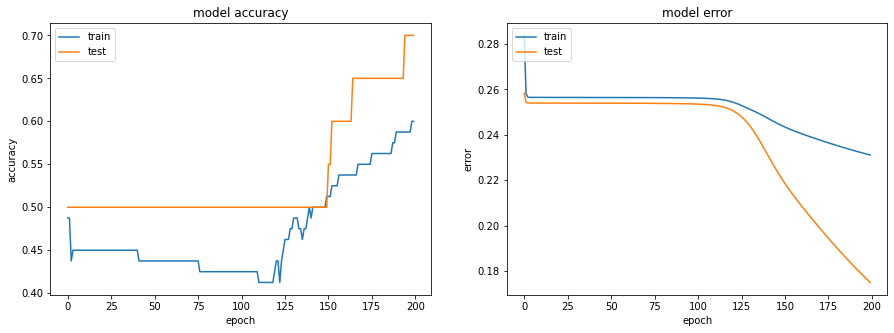

In [88]:
import matplotlib.pyplot as plt
def results(history):
    # Accuracy
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['training_accuracy']); plt.plot(history['testing_accuracy']);
    plt.title('model accuracy'); plt.ylabel('accuracy');
    plt.xlabel('epoch'); plt.legend(['train', 'test'], loc='upper left');

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['training_error']); plt.plot(history['testing_error']);
    plt.title('model error'); plt.ylabel('error');
    plt.xlabel('epoch'); plt.legend(['train', 'test'], loc='upper left');
    plt.show()
results(history)